In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore") # отключаем предупреждения
pd.set_option('display.float_format', lambda x: '%.5f' % x) # переключим режим отображения чисел
pd.set_option('display.max_rows', 10)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
!ls drive/My\ Drive/Colab\ Notebooks/prohack_dataset/

FAQ_1.pptx  test.csv  train.csv


In [0]:
path = '/content/drive/My Drive/Colab Notebooks/prohack_dataset/'

train = pd.read_csv(path + 'train.csv')
test = pd.read_csv(path + 'test.csv')

In [0]:
train

,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",Population using at least basic drinking-water services (%),Population using at least basic sanitation services (%),Gross capital formation (% of GGP),"Population, total (millions)","Population, urban (%)","Mortality rate, under-five (per 1,000 live births)","Mortality rate, infant (per 1,000 live births)",Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64)),"Population, ages 15–64 (millions)","Population, ages 65 and older (millions)","Life expectancy at birth, male (galactic years)","Life expectancy at birth, female (galactic years)","Population, under age 5 (millions)",Young age (0-14) dependency ratio (per 100 creatures ages 15-64),"Adolescent birth rate (births per 1,000 female creatures ages 15-19)",Total unemployment rate (female to male ratio),Vulnerable employment (% of total employment),"Unemployment, total (% of labour force)",Employment in agriculture (% of total employment),Labour force participation rate (% ages 15 and older),"Labour force participation rate (% ages 15 and older), female",Employment in services (% of total employment),"Labour force participation rate (% ages 15 and older), male",Employment to population ratio (% ages 15 and older),Jungle area (% of total land area),"Share of employment in nonagriculture, female (% of total employment in nonagriculture)",Youth unemployment rate (female to male ratio),"Unemployment, youth (% ages 15–24)","Mortality rate, female grown up (per 1,000 people)","Mortality rate, male grown up (per 1,000 people)","Infants lacking immunization, red hot disease (% of one-galactic year-olds)","Infants lacking immunization, Combination Vaccine (% of one-galactic year-olds)",Gross galactic product (GGP) per capita,"Gross galactic product (GGP), total","Outer Galaxies direct investment, net inflows (% of GGP)",Exports and imports (% of GGP),Share of seats in senate (% held by female),Natural resource depletion,"Mean years of education, female (galactic years)","Mean years of education, male (galactic years)","Expected years of education, female (galactic years)","Expected years of education, male (galactic years)","Maternal mortality ratio (deaths per 100,000 live births)",Renewable energy consumption (% of total final energy consumption),"Estimated gross galactic income per capita, male","Estimated gross galactic income per capita, female",Rural population with access to electricity (%),Domestic credit provided by financial sector (% of GGP),"Population with at least some secondary education, female (% ages 25 and older)","Population with at least some secondary education, male (% ages 25 and older)",Gross fixed capital formation (% of GGP),"Remittances, inflows (% of GGP)",Population with at least some secondary education (% ages 25 and older),Intergalactic inbound tourists (thousands),"Gross enrolment ratio, primary (% of primary under-age population)","Respiratory disease incidence (per 100,000 people)",Interstellar phone subscriptions (per 100 people),"Interstellar Data Net users, total (% of population)",Current health expenditure (% of GGP),"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),y
0,990025,Large Magellanic Cloud (LMC),0.62866,63.12520,27109.23431,0.64604,8.24054,nan,nan,nan,nan,nan,nan,38.30548,681.84109,22.13144,150.25929,129.84179,12.40381,490.44640,60.12158,57.02818,69.82537,46.01823,98.21607

In [0]:
test

,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",Population using at least basic drinking-water services (%),Population using at least basic sanitation services (%),Gross capital formation (% of GGP),"Population, total (millions)","Population, urban (%)","Mortality rate, under-five (per 1,000 live births)","Mortality rate, infant (per 1,000 live births)",Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64)),"Population, ages 15–64 (millions)","Population, ages 65 and older (millions)","Life expectancy at birth, male (galactic years)","Life expectancy at birth, female (galactic years)","Population, under age 5 (millions)",Young age (0-14) dependency ratio (per 100 creatures ages 15-64),"Adolescent birth rate (births per 1,000 female creatures ages 15-19)",Total unemployment rate (female to male ratio),Vulnerable employment (% of total employment),"Unemployment, total (% of labour force)",Employment in agriculture (% of total employment),Labour force participation rate (% ages 15 and older),"Labour force participation rate (% ages 15 and older), female",Employment in services (% of total employment),"Labour force participation rate (% ages 15 and older), male",Employment to population ratio (% ages 15 and older),Jungle area (% of total land area),"Share of employment in nonagriculture, female (% of total employment in nonagriculture)",Youth unemployment rate (female to male ratio),"Unemployment, youth (% ages 15–24)","Mortality rate, female grown up (per 1,000 people)","Mortality rate, male grown up (per 1,000 people)","Infants lacking immunization, red hot disease (% of one-galactic year-olds)","Infants lacking immunization, Combination Vaccine (% of one-galactic year-olds)",Gross galactic product (GGP) per capita,"Gross galactic product (GGP), total","Outer Galaxies direct investment, net inflows (% of GGP)",Exports and imports (% of GGP),Share of seats in senate (% held by female),Natural resource depletion,"Mean years of education, female (galactic years)","Mean years of education, male (galactic years)","Expected years of education, female (galactic years)","Expected years of education, male (galactic years)","Maternal mortality ratio (deaths per 100,000 live births)",Renewable energy consumption (% of total final energy consumption),"Estimated gross galactic income per capita, male","Estimated gross galactic income per capita, female",Rural population with access to electricity (%),Domestic credit provided by financial sector (% of GGP),"Population with at least some secondary education, female (% ages 25 and older)","Population with at least some secondary education, male (% ages 25 and older)",Gross fixed capital formation (% of GGP),"Remittances, inflows (% of GGP)",Population with at least some secondary education (% ages 25 and older),Intergalactic inbound tourists (thousands),"Gross enrolment ratio, primary (% of primary under-age population)","Respiratory disease incidence (per 100,000 people)",Interstellar phone subscriptions (per 100 people),"Interstellar Data Net users, total (% of population)",Current health expenditure (% of GGP),"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII)
0,1007012,KK98 77,0.45609,51.56254,12236.57645,0.59333,10.41416,10.69907,0.54711,0.55627,232.62184,105.19309,64.24139,17.41835,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,n

In [0]:
pd.set_option('display.max_rows', None)

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3865 entries, 0 to 3864
Data columns (total 80 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   galactic year                                                                            3865 non-null   int64  
 1   galaxy                                                                                   3865 non-null   object 
 2   existence expectancy index                                                               3864 non-null   float64
 3   existence expectancy at birth                                                            3864 non-null   float64
 4   Gross income per capita                                                                  3837 non-null   float64
 5   Income Index                                                  

In [0]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 79 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   galactic year                                                                            890 non-null    int64  
 1   galaxy                                                                                   890 non-null    object 
 2   existence expectancy index                                                               885 non-null    float64
 3   existence expectancy at birth                                                            885 non-null    float64
 4   Gross income per capita                                                                  885 non-null    float64
 5   Income Index                                                    

In [0]:
train.describe()

,galactic year,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",Population using at least basic drinking-water services (%),Population using at least basic sanitation services (%),Gross capital formation (% of GGP),"Population, total (millions)","Population, urban (%)","Mortality rate, under-five (per 1,000 live births)","Mortality rate, infant (per 1,000 live births)",Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64)),"Population, ages 15–64 (millions)","Population, ages 65 and older (millions)","Life expectancy at birth, male (galactic years)","Life expectancy at birth, female (galactic years)","Population, under age 5 (millions)",Young age (0-14) dependency ratio (per 100 creatures ages 15-64),"Adolescent birth rate (births per 1,000 female creatures ages 15-19)",Total unemployment rate (female to male ratio),Vulnerable employment (% of total employment),"Unemployment, total (% of labour force)",Employment in agriculture (% of total employment),Labour force participation rate (% ages 15 and older),"Labour force participation rate (% ages 15 and older), female",Employment in services (% of total employment),"Labour force participation rate (% ages 15 and older), male",Employment to population ratio (% ages 15 and older),Jungle area (% of total land area),"Share of employment in nonagriculture, female (% of total employment in nonagriculture)",Youth unemployment rate (female to male ratio),"Unemployment, youth (% ages 15–24)","Mortality rate, female grown up (per 1,000 people)","Mortality rate, male grown up (per 1,000 people)","Infants lacking immunization, red hot disease (% of one-galactic year-olds)","Infants lacking immunization, Combination Vaccine (% of one-galactic year-olds)",Gross galactic product (GGP) per capita,"Gross galactic product (GGP), total","Outer Galaxies direct investment, net inflows (% of GGP)",Exports and imports (% of GGP),Share of seats in senate (% held by female),Natural resource depletion,"Mean years of education, female (galactic years)","Mean years of education, male (galactic years)","Expected years of education, female (galactic years)","Expected years of education, male (galactic years)","Maternal mortality ratio (deaths per 100,000 live births)",Renewable energy consumption (% of total final energy consumption),"Estimated gross galactic income per capita, male","Estimated gross galactic income per capita, female",Rural population with access to electricity (%),Domestic credit provided by financial sector (% of GGP),"Population with at least some secondary education, female (% ages 25 and older)","Population with at least some secondary education, male (% ages 25 and older)",Gross fixed capital formation (% of GGP),"Remittances, inflows (% of GGP)",Population with at least some secondary education (% ages 25 and older),Intergalactic inbound tourists (thousands),"Gross enrolment ratio, primary (% of primary under-age population)","Respiratory disease incidence (per 100,000 people)",Interstellar phone subscriptions (per 100 people),"Interstellar Data Net users, total (% of population)",Current health expenditure (% of GGP),"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),y
count,3865.00000,3864.00000,3864.00000,3837.00000,3837.00000,3732.00000,3502.00000,3474.00000,3474.00000,3432.00000,2021.00000,2015.00000,1502.00000,1271.00000,1271.00000,1271.00000,1259.00000,1264.00000,1264.00000,1264.00000

In [0]:
test.describe()

,galactic year,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",Population using at least basic drinking-water services (%),Population using at least basic sanitation services (%),Gross capital formation (% of GGP),"Population, total (millions)","Population, urban (%)","Mortality rate, under-five (per 1,000 live births)","Mortality rate, infant (per 1,000 live births)",Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64)),"Population, ages 15–64 (millions)","Population, ages 65 and older (millions)","Life expectancy at birth, male (galactic years)","Life expectancy at birth, female (galactic years)","Population, under age 5 (millions)",Young age (0-14) dependency ratio (per 100 creatures ages 15-64),"Adolescent birth rate (births per 1,000 female creatures ages 15-19)",Total unemployment rate (female to male ratio),Vulnerable employment (% of total employment),"Unemployment, total (% of labour force)",Employment in agriculture (% of total employment),Labour force participation rate (% ages 15 and older),"Labour force participation rate (% ages 15 and older), female",Employment in services (% of total employment),"Labour force participation rate (% ages 15 and older), male",Employment to population ratio (% ages 15 and older),Jungle area (% of total land area),"Share of employment in nonagriculture, female (% of total employment in nonagriculture)",Youth unemployment rate (female to male ratio),"Unemployment, youth (% ages 15–24)","Mortality rate, female grown up (per 1,000 people)","Mortality rate, male grown up (per 1,000 people)","Infants lacking immunization, red hot disease (% of one-galactic year-olds)","Infants lacking immunization, Combination Vaccine (% of one-galactic year-olds)",Gross galactic product (GGP) per capita,"Gross galactic product (GGP), total","Outer Galaxies direct investment, net inflows (% of GGP)",Exports and imports (% of GGP),Share of seats in senate (% held by female),Natural resource depletion,"Mean years of education, female (galactic years)","Mean years of education, male (galactic years)","Expected years of education, female (galactic years)","Expected years of education, male (galactic years)","Maternal mortality ratio (deaths per 100,000 live births)",Renewable energy consumption (% of total final energy consumption),"Estimated gross galactic income per capita, male","Estimated gross galactic income per capita, female",Rural population with access to electricity (%),Domestic credit provided by financial sector (% of GGP),"Population with at least some secondary education, female (% ages 25 and older)","Population with at least some secondary education, male (% ages 25 and older)",Gross fixed capital formation (% of GGP),"Remittances, inflows (% of GGP)",Population with at least some secondary education (% ages 25 and older),Intergalactic inbound tourists (thousands),"Gross enrolment ratio, primary (% of primary under-age population)","Respiratory disease incidence (per 100,000 people)",Interstellar phone subscriptions (per 100 people),"Interstellar Data Net users, total (% of population)",Current health expenditure (% of GGP),"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII)
count,890.00000,885.00000,885.00000,885.00000,885.00000,885.00000,882.00000,882.00000,882.00000,880.00000,880.00000,880.00000,828.00000,615.00000,615.00000,615.00000,615.00000,610.00000,610.00000,610.00000,610.00000,610.00000,6

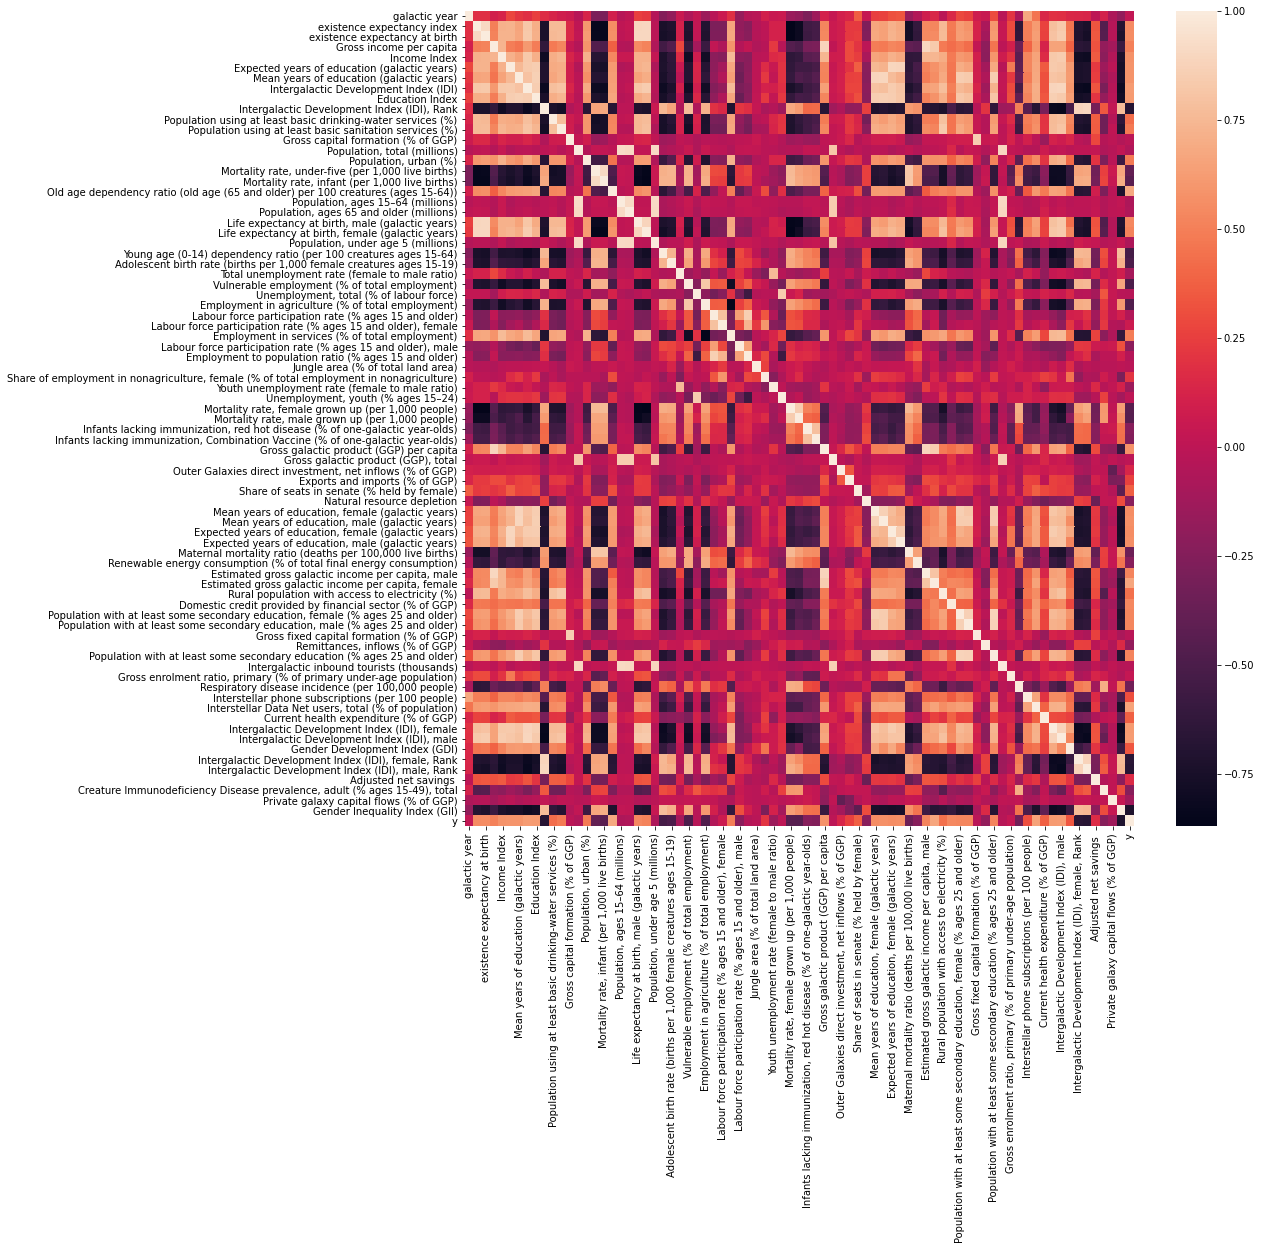

In [0]:
plt.figure(figsize=(15, 15))
sns.heatmap(train.corr());

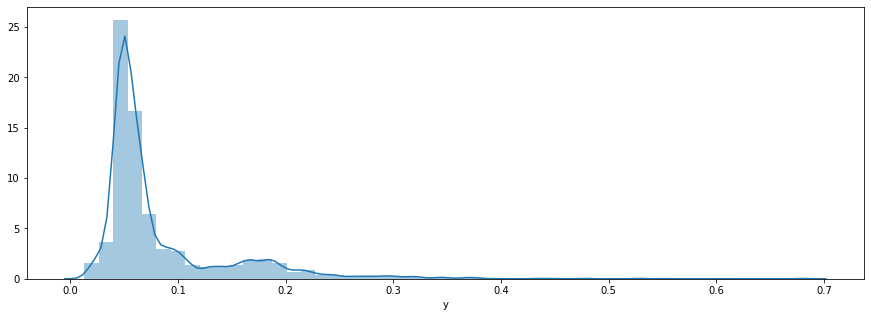

In [0]:
plt.figure(figsize=(15, 5))
sns.distplot(train['y']);

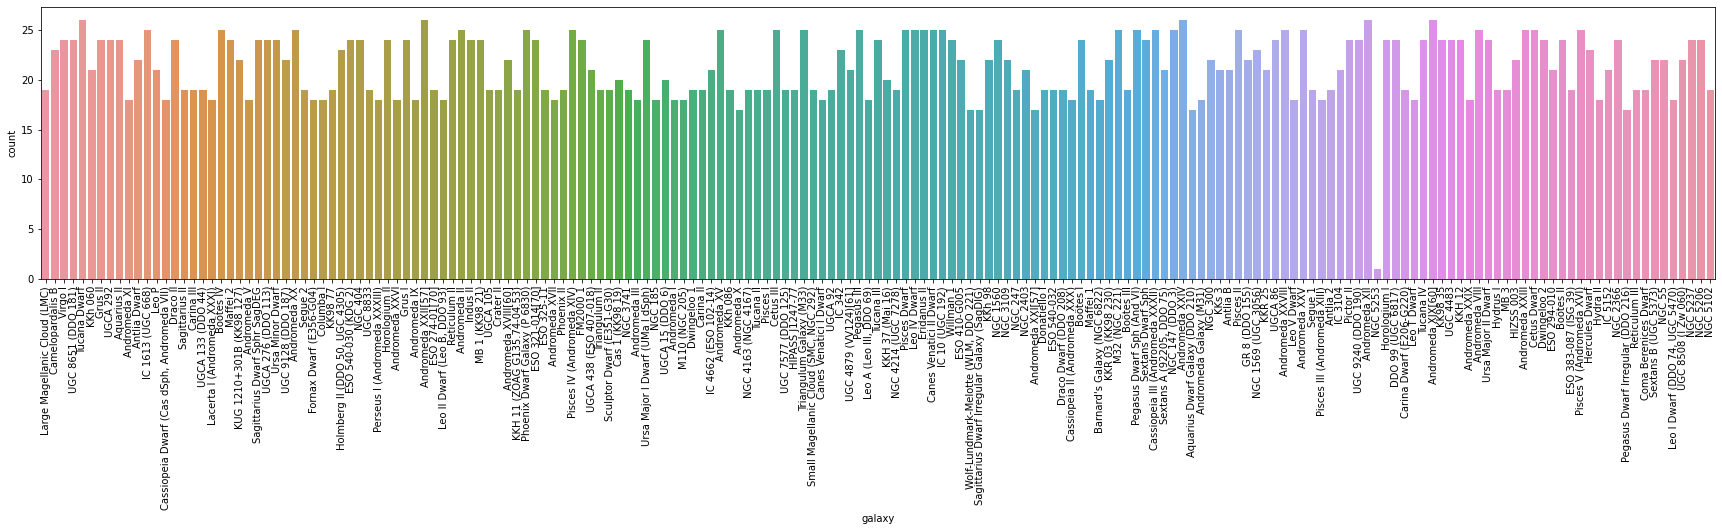

In [0]:
plt.figure(figsize=(30, 5))
galaxy = sns.countplot(train['galaxy'])
galaxy.set_xticklabels(galaxy.get_xticklabels(), rotation=90);
# sns.countplot(test['galaxy'])

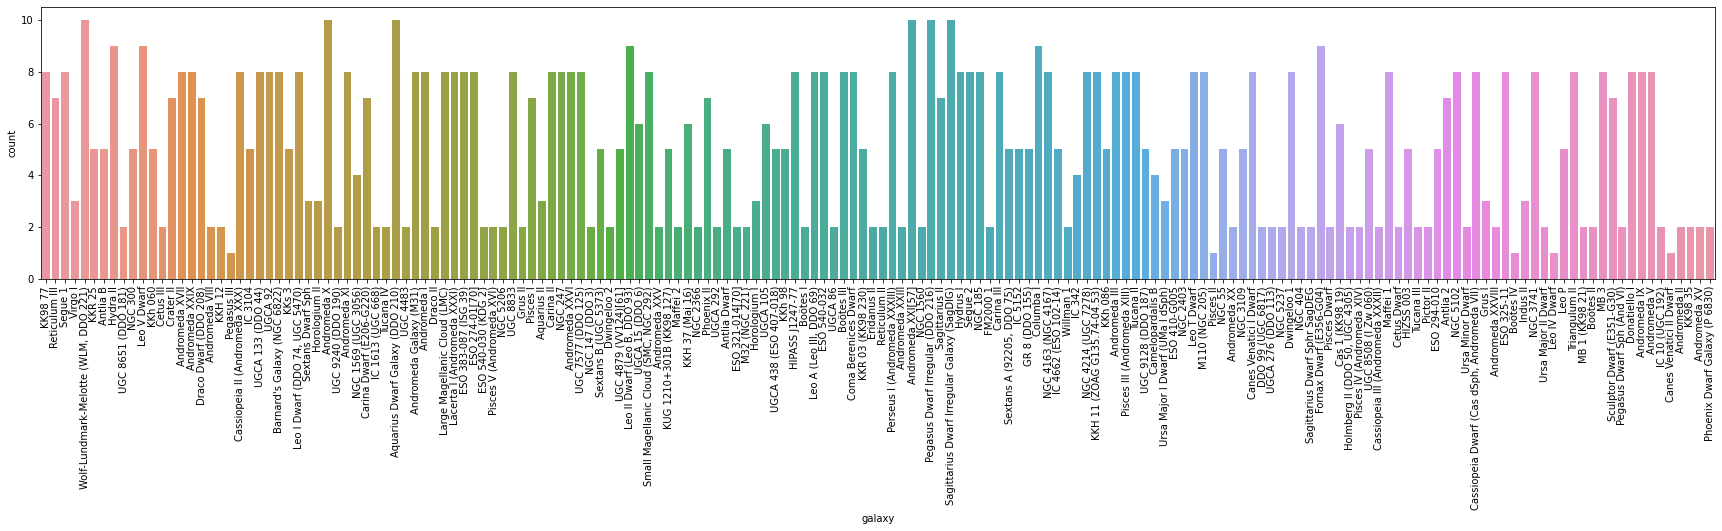

In [0]:
plt.figure(figsize=(30, 5))
galaxy = sns.countplot(test['galaxy'])
galaxy.set_xticklabels(galaxy.get_xticklabels(), rotation=90);

In [0]:
train.drop(['y'], axis=1).corrwith(train['y']).sort_values(ascending=False)

Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64))           0.67998
Estimated gross galactic income per capita, female                                         0.66746
Interstellar Data Net users, total (% of population)                                       0.65182
Intergalactic Development Index (IDI)                                                      0.62511
Intergalactic Development Index (IDI), male                                                0.62270
Intergalactic Development Index (IDI), female                                              0.61497
Education Index                                                                            0.61394
Expected years of education (galactic years)                                               0.58407
Mean years of education (galactic years)                                                   0.58386
Income Index                                                                               0.57997
Gross gala

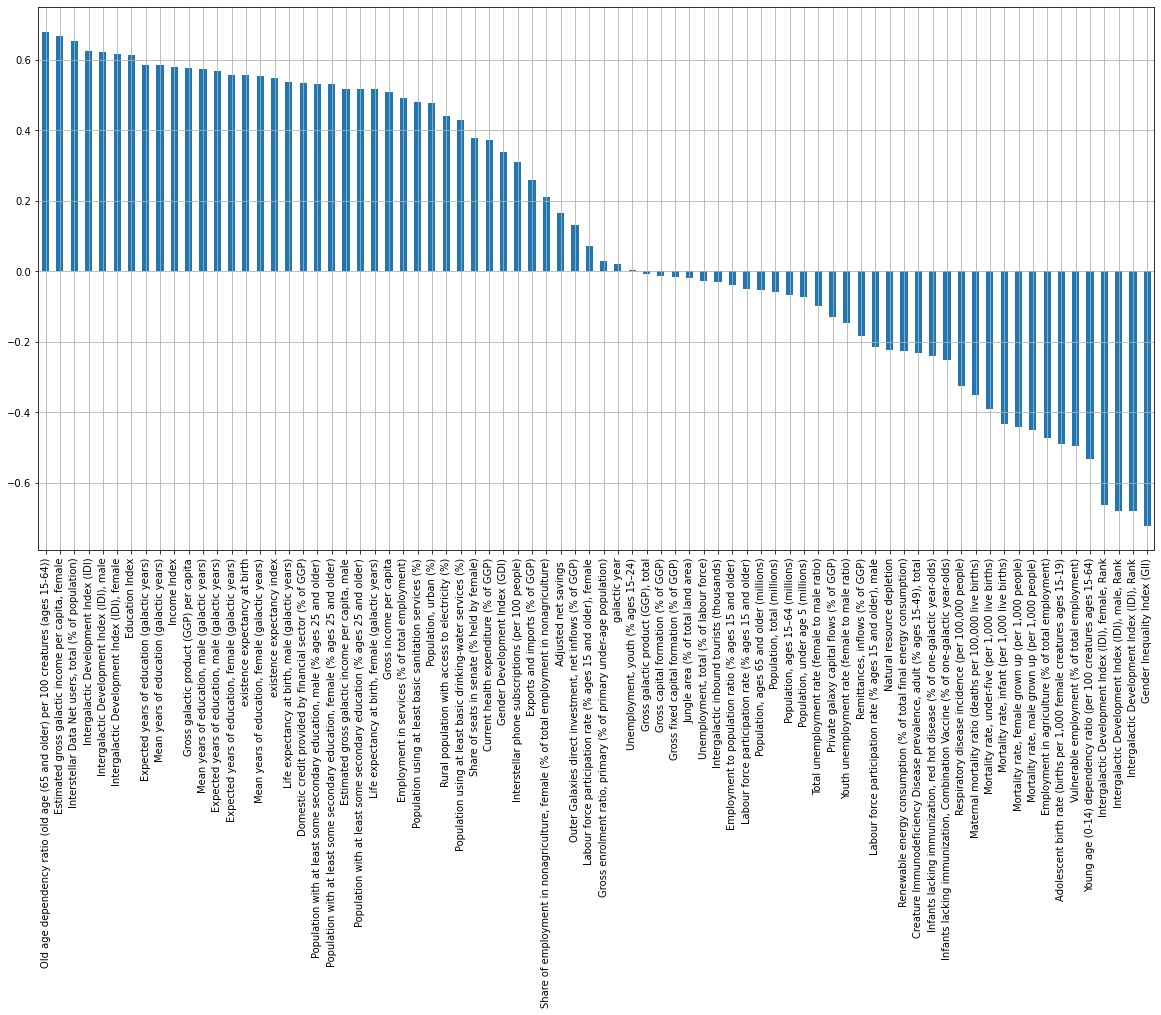

In [0]:
plt.figure(figsize=(20, 10))
correlation_plot = train.drop(['y'], axis=1).corrwith(train['y']).sort_values(ascending=False).plot.bar(grid=True)
correlation_plot.set_xticklabels(correlation_plot.get_xticklabels(), rotation=90);

In [0]:
for i in train.columns:
    print(i)

galactic year
galaxy
existence expectancy index
existence expectancy at birth
Gross income per capita
Income Index
Expected years of education (galactic years)
Mean years of education (galactic years)
Intergalactic Development Index (IDI)
Education Index
Intergalactic Development Index (IDI), Rank
Population using at least basic drinking-water services (%)
Population using at least basic sanitation services (%)
Gross capital formation (% of GGP)
Population, total (millions)
Population, urban (%)
Mortality rate, under-five (per 1,000 live births)
Mortality rate, infant (per 1,000 live births)
Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64))
Population, ages 15–64 (millions)
Population, ages 65 and older (millions)
Life expectancy at birth, male (galactic years)
Life expectancy at birth, female (galactic years)
Population, under age 5 (millions)
Young age (0-14) dependency ratio (per 100 creatures ages 15-64)
Adolescent birth rate (births per 1,000 female 

In [0]:
pd.set_option('display.max_rows', 10)

In [0]:
# full_train = train.fillna(train.interpolate(inplace=False))
# full_test = test.fillna(test.interpolate(inplace=False))
# full_train = train.fillna(train.mean())
# full_test = test.fillna(test.mean())

In [0]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2)
full_train = imputer.fit_transform(train.drop(['galaxy', 'y'], axis=1))
full_test = imputer.transform(test.drop(['galaxy'], axis=1))

full_train = pd.DataFrame(data=full_train, columns=train.drop(['galaxy', 'y'], axis=1).columns)
full_train['galaxy'] = train['galaxy']
full_train['y'] = train['y']

full_test = pd.DataFrame(data=full_test, columns=test.drop(['galaxy'], axis=1).columns)
full_test['galaxy'] = test['galaxy']

In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_train = scaler.fit_transform(full_train.drop(['galaxy', 'y'], axis=1))
scaled_train = pd.DataFrame(data=scaled_train, columns=train.drop(['galaxy', 'y'], axis=1).columns)
scaled_train['galaxy'] = train['galaxy']
scaled_train['y'] = train['y']

scaled_test = scaler.transform(full_test.drop(['galaxy'], axis=1))
scaled_test = pd.DataFrame(data=scaled_test, columns=test.drop(['galaxy'], axis=1).columns)
scaled_test['galaxy'] = test['galaxy']

In [0]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)
poly_train = poly.fit_transform(scaled_train.drop(['galaxy', 'y'], axis=1))
poly_train = pd.DataFrame(data=poly_train, columns=train.drop(['galaxy', 'y'], axis=1).columns)
poly_train['galaxy'] = train['galaxy']
poly_train['y'] = train['y']

poly_test = scaler.transform(scaled_test.drop(['galaxy'], axis=1))
poly_test = pd.DataFrame(data=poly_test, columns=test.drop(['galaxy'], axis=1).columns)
poly_test['galaxy'] = test['galaxy']

In [0]:
full_train = pd.concat([full_train, pd.get_dummies(full_train['galaxy'])], axis=1).drop(['galaxy'], axis=1)
full_test = pd.concat([full_test, pd.get_dummies(full_test['galaxy'])], axis=1).drop(['galaxy'], axis=1)

scaled_train = pd.concat([scaled_train, pd.get_dummies(scaled_train['galaxy'])], axis=1).drop(['galaxy'], axis=1)
scaled_test = pd.concat([scaled_test, pd.get_dummies(scaled_test['galaxy'])], axis=1).drop(['galaxy'], axis=1)

poly_train = pd.concat([poly_train, pd.get_dummies(poly_train['galaxy'])], axis=1).drop(['galaxy'], axis=1)
poly_test = pd.concat([poly_test, pd.get_dummies(poly_test['galaxy'])], axis=1).drop(['galaxy'], axis=1)

In [0]:
# full_train = full_train.drop(['galaxy', 'galactic year'], axis=1)
# full_test = full_test.drop(['galaxy', 'galactic year'], axis=1)
# scaled_train = scaled_train.drop(['galaxy', 'galactic year'], axis=1)
# scaled_test = scaled_test.drop(['galaxy', 'galactic year'], axis=1)

In [0]:
def normilize_column_names(string):
    new = ""
    for i in string:
        if i.isalnum() == True or i == " ":
            new += i
    return new

new_names = {}
for i in full_train.columns:
    new_names[i] = normilize_column_names(i)

full_train.rename(columns=new_names, inplace=True)
full_test.rename(columns=new_names, inplace=True)

scaled_train.rename(columns=new_names, inplace=True)
scaled_test.rename(columns=new_names, inplace=True)

In [0]:
full_train

,galactic year,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education galactic years,Mean years of education galactic years,Intergalactic Development Index IDI,Education Index,Intergalactic Development Index IDI Rank,Population using at least basic drinkingwater services,Population using at least basic sanitation services,Gross capital formation of GGP,Population total millions,Population urban,Mortality rate underfive per 1000 live births,Mortality rate infant per 1000 live births,Old age dependency ratio old age 65 and older per 100 creatures ages 1564,Population ages 1564 millions,Population ages 65 and older millions,Life expectancy at birth male galactic years,Life expectancy at birth female galactic years,Population under age 5 millions,Young age 014 dependency ratio per 100 creatures ages 1564,Adolescent birth rate births per 1000 female creatures ages 1519,Total unemployment rate female to male ratio,Vulnerable employment of total employment,Unemployment total of labour force,Employment in agriculture of total employment,Labour force participation rate ages 15 and older,Labour force participation rate ages 15 and older female,Employment in services of total employment,Labour force participation rate ages 15 and older male,Employment to population ratio ages 15 and older,Jungle area of total land area,Share of employment in nonagriculture female of total employment in nonagriculture,Youth unemployment rate female to male ratio,Unemployment youth ages 1524,Mortality rate female grown up per 1000 people,Mortality rate male grown up per 1000 people,...,Reticulum II,Reticulum III,Sagittarius Dwarf Irregular Galaxy SagDIG,Sagittarius Dwarf Sphr SagDEG,Sagittarius II,Sculptor Dwarf E351G30,Segue 1,Segue 2,Sextans A 92205 DDO 75,Sextans B UGC 5373,Sextans Dwarf Sph,Small Magellanic Cloud SMC NGC 292,Triangulum Galaxy M33,Triangulum II,Tucana Dwarf,Tucana II,Tucana III,Tucana IV,UGC 4483,UGC 4879 VV12461,UGC 7577 DDO 125,UGC 8508 I Zw 060,UGC 8651 DDO 181,UGC 8833,UGC 9128 DDO 187,UGC 9240 DDO 190,UGCA 105,UGCA 133 DDO 44,UGCA 15 DDO 6,UGCA 276 DDO 113,UGCA 292,UGCA 438 ESO 407018,UGCA 86,UGCA 92,Ursa Major I Dwarf UMa I dSph,Ursa Major II Dwarf,Ursa Minor Dwarf,Virgo I,Willman 1,WolfLundmarkMelotte WLM DDO 221
0,990025.00000,0.62866,63.12520,27109.23431,0.64604,8.24054,14.22521,0.89729,0.74651,82.70907,78.08464,77.42151,38.30548,681.84109,22.13144,150.25929,129.84179,12.40381,490.44640,60.12158,57.02818,69.82537,46.01823,98.21607,174.61790,2.86583,37.94761,6.42821,47.58088,79.61407,73.07160,73.27496,85.85154,67.87018,73.16635,53.73507,2.39682,20.03365,431.27030,466.08929,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,990025.00000,0.81808,81.00499,30166.79396,0.85225,10.67182,4.74247,0.83362,0.46787,152.52220,116.00318,130.33242,36.25556,423.97309,89.29418,117.06933,61.82259,13.05490,560.54771,58.57300,69.87390,76.75230,40.16796,88.32257,109.89238,2.37757,72.62669,18.22847,57.01864,63.81372,45.48207,70.19718,93.52636,67.71734,35.59037,57.35023,2.32720,39.43224,221.41101,376.47515,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,990025.00000,0.65944,59.57053,8441.70735,0.49976,8.84032,5.58397,0.46911,0.36384,209.81327,92.24919,40.11313,18.09399,285.57221,57.49108,226.52376,134.55844,15.96300,555.01246,43.07850,59.46263,59.15251,91.09367,114.16400,230.57367,1.99038,100.26252,15.01802,89.35454,80.87415,75.21773,44.47044,95.04127,74.16859,48.89255,36.23271,1.60759,24.40616,513.73040,581.06360,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,990025.00000,0.55586,52.33329,17039.19046,0.44169,7.75419,4.54472,0.42699,0.33728,190.71696,67.69979,43.38347,24.68832,327.20225,47.78546,279.00018,193.22880,12.94099,766.80770,51.31837,50.53580,54.93137,92.72789,97.64523,198.97133,2.17195,112.23953,10.75432,89.87396,84.72188,82.02613,50.46637,86.30783,73.50673,77.3954

# Models

In [0]:
import xgboost
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(full_train.drop(['y'], axis=1), full_train['y'], test_size=0.33, random_state=42)

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(scaled_train.drop(['y'], axis=1), scaled_train['y'], test_size=0.33, random_state=42)

In [0]:
model_error = {}

In [0]:
%%time
model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train_scaled)

pred_lr = model_lr.predict(X_test_scaled)
lr_rmse = np.sqrt(mean_squared_error(y_test_scaled, pred_lr))
r2_lr = r2_score(y_test_scaled, pred_lr)
model_error['LinearRegression'] = lr_rmse
print(lr_rmse, r2_lr)

0.014845499143462476 0.9445715469191518
CPU times: user 86.3 ms, sys: 32.8 ms, total: 119 ms
Wall time: 67.6 ms


In [0]:
%%time
model_sgd = SGDRegressor()
model_sgd.fit(X_train_scaled, y_train_scaled)

pred_sgd = model_sgd.predict(X_test_scaled)
sgd_rmse = np.sqrt(mean_squared_error(y_test_scaled, pred_sgd))
model_error['SGDRegressor'] = sgd_rmse
print(sgd_rmse)

0.037948741697630795
CPU times: user 38.9 ms, sys: 21 ms, total: 59.9 ms
Wall time: 34.6 ms


In [0]:
%%time
model_xgboost = xgboost.XGBRegressor()
model_xgboost.fit(X_train, y_train)

pred_xgb = model_xgboost.predict(X_test)
xgboost_rmse = np.sqrt(mean_squared_error(y_test, pred_xgb))
model_error['XGBoost'] = xgboost_rmse
print(xgboost_rmse)

[20:05:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.02185324886736284
CPU times: user 2.18 s, sys: 82.8 ms, total: 2.26 s
Wall time: 2.18 s


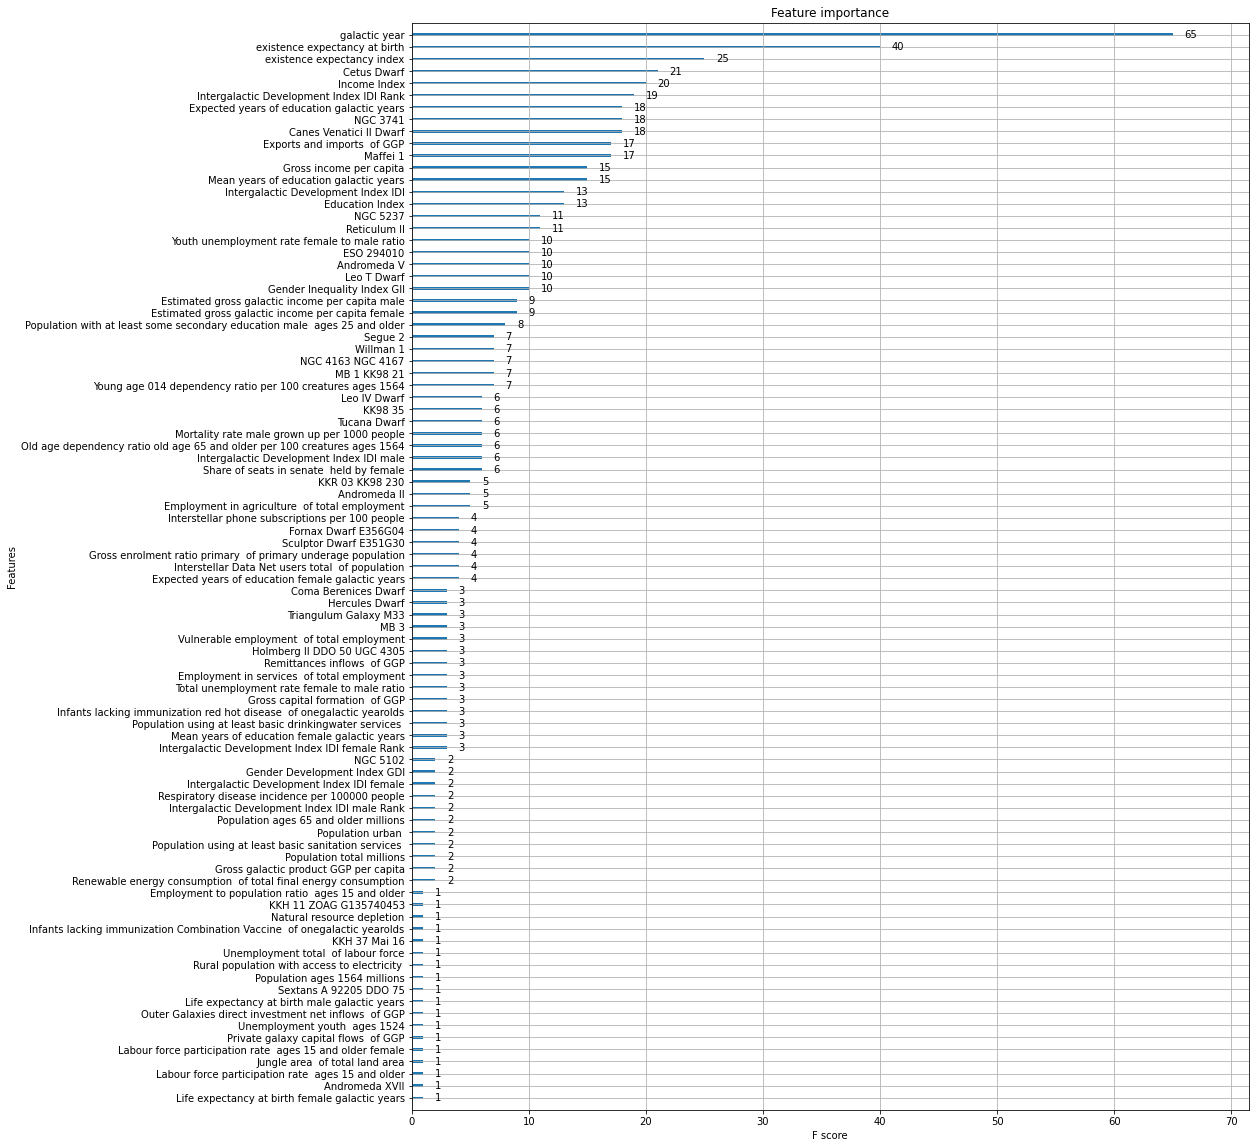

In [0]:
plt.rcParams["figure.figsize"] = (15, 20)
xgboost.plot_importance(model_xgboost) # график важности признаков

In [0]:
%%time
model_rf = RandomForestRegressor(n_estimators=200)
model_rf.fit(X_train, y_train)

pred_rf = model_rf.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, pred_rf))
model_error['RandomForest'] = rf_rmse
print(rf_rmse)

0.02601757317595347
CPU times: user 38.2 s, sys: 11.4 ms, total: 38.2 s
Wall time: 38.4 s


In [0]:
full_rmse = 0
for key, value in model_error.items():
  full_rmse += value
  print("RMSE ошибка модели {} - {}".format(key, str(value)))
print("Среднее качество моделей - {}".format(str(full_rmse / len(model_error))))

RMSE ошибка модели LinearRegression - 0.014845499143462476
RMSE ошибка модели SGDRegressor - 0.037948741697630795
RMSE ошибка модели XGBoost - 0.02185324886736284
RMSE ошибка модели RandomForest - 0.02601757317595347
Среднее качество моделей - 0.025166265721102393
